In [1]:
import numpy as np
import matplotlib.pyplot as plt

[-0.95357178 -0.95357178 -0.95357178 -0.95357178 -0.95357178 -0.95357178
 -0.95357178 -0.95357178 -0.95357178 -0.95357178 -0.95357178 -0.95357178
 -0.95357178 -0.95357178 -0.95357178 -0.95357178 -0.95357178 -0.95357178
 -0.95357178 -0.95357178]
-19.07143559844221


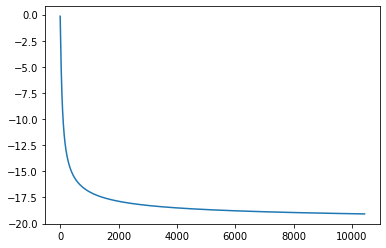

In [13]:
t = 0
converged = False
x = np.zeros(20)
x_0 = x
c = np.ones(20)
gamma = 0.1
eps = 0.00001
tol = 0.00001
res = []
k = 0
# Since Constraint can be written as h_i(x) = x_i-1<=0 and -1 - x_i<=0
def diff(x):
    delta_phi = 0
    
    first_constraint = np.array([(-1)*(1/(x[i]-1)) for i in range(20)])
    second_constraint = np.array([(-1)*((-1)/(-1-x[i])) for i in range(20)])
    
    return first_constraint + second_constraint

def diffdiff(x):
    first_constraint = np.array([1/((x[i]-1)**2)for i in range(20)])
    second_constraint = np.array([1/((-1-x[i])**2)for i in range(20)])
    return np.diag(first_constraint) + np.diag(second_constraint) 

while not converged:
    #print(x@c)
    
    #t_next = t + gamma/np.linalg.norm(c, 2)
    t_next = t + gamma/np.sqrt((c.T@diffdiff(x)@c))
    
    
    x_next = x - (1/(1+eps))*(np.linalg.inv(diffdiff(x)))@(t_next*c+diff(x))
    if np.linalg.norm(x_next - x)<=tol:
        break
    x, t = x_next, t_next
    res.append(x@c)
    k += 1
    
plt.plot(np.arange(k), res)


print(x)
print(x@c)
